In [18]:
%matplotlib widget
import numpy as np
import json, os, glob, numbers
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

<a id='averaged_XAS'></a>
## Load data

In [211]:
pgroup = 'p22250'
Loaddir_name = ''

#runlist = np.arange(41, 45)
runlist = [335]

t0_offsets = [0]*len(runlist)
##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_name)
#Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_name)

In [853]:
#Plot_correlations_scan(pgroup, Loaddir, runlist, path='raw', timescan=False, lowlim = 0.90)
#Plot_scan_2diodes(pgroup, Loaddir, runlist, path='raw', timescan=False)

Run 335, Delays_stage offset by 0 fs
Run 335, Delays_corr offset by 0 fs
[335]


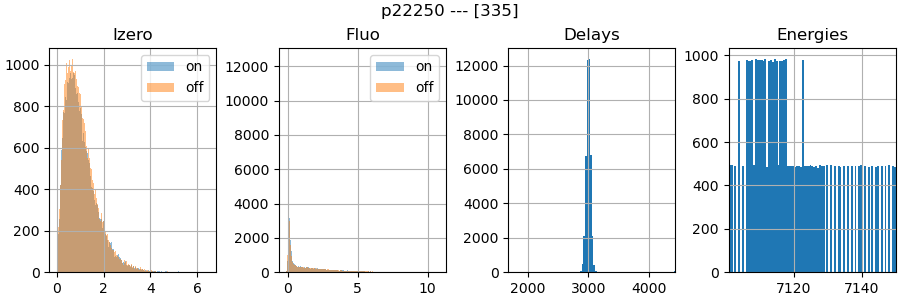

Time delay axis rebinned with TT data


In [212]:
average_twodiodes = False
withTT = True

switch_diodes = False #False for Diode 1, True for diode 2
t0_offset=[0]
##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_name)
#Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_name)
#firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
from sfdata import SFScanInfo
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

#data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist, average_twodiodes, switch_diodes)
data, titlestring_stack = load_reduced_data_offset(pgroup, Loaddir, runlist, t0_offsets, average_twodiodes, switch_diodes)
#data, titlestring_stack = load_reduced_data_noPair(pgroup, Loaddir, runlist, average_twodiodes)

globals().update(data)
print (runlist)
#print ('{} scan(s), {laser.delay.pumpprobe} total on/off shots'.format(len(runlist), len(pump_1)))

Plot_reduced_data(data, scan, titlestring_stack, withTT)

pump_1       = np.asarray(pump_1)
unpump_1     = np.asarray(unpump_1)
Izero_pump   = np.asarray(Izero_pump)
Izero_unpump = np.asarray(Izero_unpump)
Delays_stage = np.asarray(Delays_stage)
arrTimes     = np.asarray(arrTimes)
energy       = np.asarray(energy)
Delays_corr  = np.asarray(Delays_corr)
readbacks    = np.asarray(readbacks, dtype=object)


In [163]:
data.keys()

dict_keys(['name', 'pump_1', 'unpump_1', 'pump_2', 'unpump_2', 'pump_1_raw', 'unpump_1_raw', 'pump_2_raw', 'unpump_2_raw', 'Izero_pump', 'Izero_unpump', 'Delays_stage', 'arrTimes', 'Delays_corr', 'energy', 'energypad', 'readbacks', 'corr1', 'corr2'])

In [164]:
len(data['energy'])

43537

In [227]:
pgroup = 'p22250'
Loaddir_name = ''
runlist = [339]
t0_offsets = [0]*len(runlist)
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_name)
average_twodiodes = False
withTT = True
switch_diodes = False #False for Diode 1, True for diode 2

firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
from sfdata import SFScanInfo
scan = SFScanInfo(firstrun)
print(scan.info.keys())
print(scan.info['scan_parameters'])
# print(scan.info['scan_step_info'])
print(scan.info['scan_values'])

JSONDecodeError: Expecting ',' delimiter: line 1149 column 6 (char 29012)

Run 338, Delays_stage offset by 0 fs
Run 338, Delays_corr offset by 0 fs


Text(0.5, 0.98, 'run [338]')

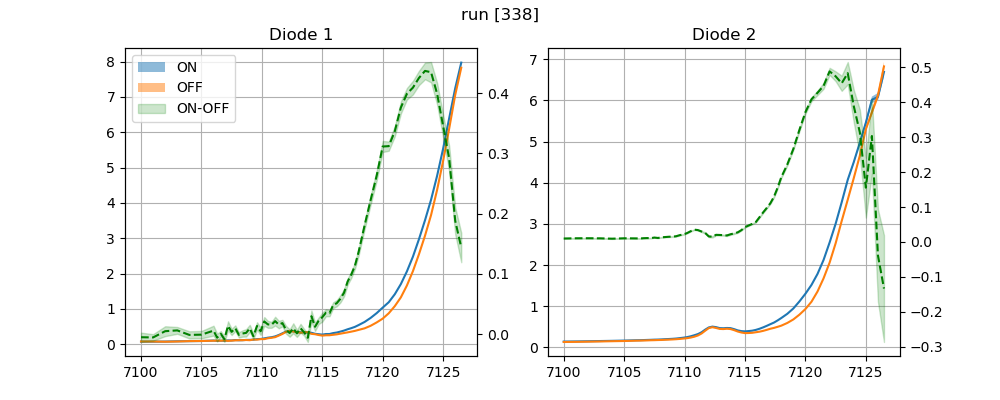

In [226]:
data, titlestring_stack = load_reduced_data_offset(pgroup, Loaddir, runlist, t0_offsets, average_twodiodes, switch_diodes)

## energy Scan
delta_E = 0.1
pump_1 = np.array(data['pump_1'])
pump_2 = np.array(data['pump_2'])
unpump_1 = np.array(data['unpump_1'])
unpump_2 = np.array(data['unpump_2'])
I0_pump = np.array(data['Izero_pump'])
I0_unpump = np.array(data['Izero_unpump'])

_on1 = pump_1/I0_pump
_off1 = unpump_1/I0_unpump

_on2 = pump_2/I0_pump
_off2 = unpump_2/I0_unpump

_energy_tar = np.array(data['readbacks']).ravel()
_energy_act =np.array(data['energy'])

ON1, OFF1 = [], []
ON1_err, OFF1_err = [], []
ON2, OFF2 = [], []
ON2_err, OFF2_err = [], []

for e in _energy_tar:
    _e_mask = np.abs(_energy_act - e) < delta_E
    _count = np.sum(_e_mask)
    _on1_e = np.nanmean(_on1[_e_mask])
    _off1_e = np.nanmean(_off1[_e_mask])
    _on1_err_e = np.nanstd(_on1[_e_mask])/np.sqrt(_count) # standard error, std/sqrt(N)
    _off1_err_e = np.nanstd(_off1[_e_mask])/np.sqrt(_count)
    
    ON1.append(_on1_e)
    OFF1.append(_off1_e)
    ON1_err.append(_on1_err_e)
    OFF1_err.append(_off1_err_e)

    _on2_e = np.nanmean(_on2[_e_mask])
    _off2_e = np.nanmean(_off2[_e_mask])
    _on2_err_e = np.nanstd(_on2[_e_mask])/np.sqrt(_count)
    _off2_err_e = np.nanstd(_off2[_e_mask])/np.sqrt(_count)
    
    ON2.append(_on2_e)
    OFF2.append(_off2_e)
    ON2_err.append(_on2_err_e)
    OFF2_err.append(_off2_err_e)

# print(_count/len(_energy_act))
ON1 = np.array(ON1)
OFF1 = np.array(OFF1)
ON2 = np.array(ON2)
OFF2 = np.array(OFF2)

ON1_err = np.array(ON1_err)
OFF1_err = np.array(OFF1_err)
ON2_err = np.array(ON2_err)
OFF2_err = np.array(OFF2_err)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(_energy_tar, ON1)
l1 = ax[0].fill_between(_energy_tar, ON1-ON1_err, ON1+ON1_err, alpha=0.5, label='ON')
ax[0].plot(_energy_tar, OFF1)
l2 = ax[0].fill_between(_energy_tar, OFF1-OFF1_err, OFF1+OFF1_err, alpha=0.5, label='OFF')
ax11 = ax[0].twinx()
_diff1 = ON1-OFF1
_diff1_err = np.sqrt(ON1_err**2 + OFF1_err**2)
ax11.plot(_energy_tar, _diff1, '--g')
l3 = ax11.fill_between(_energy_tar, _diff1-_diff1_err, _diff1+_diff1_err, color='green', alpha=0.2, label='ON-OFF')
lns = [l1, l2, l3]
labels = [l.get_label() for l in lns]

ax[0].set_title('Diode 1')
ax[0].grid('on')
ax[0].legend(lns, labels)

ax[1].plot(_energy_tar, ON2)
ax[1].fill_between(_energy_tar, ON2 - ON2_err, ON2 + ON2_err, alpha=0.5)
ax[1].plot(_energy_tar, OFF2)
ax[1].fill_between(_energy_tar, OFF2 - OFF2_err, OFF2 + OFF2_err, alpha=0.5)
ax12 = ax[1].twinx()
_diff2 = ON2 - OFF2
_diff2_err = np.sqrt(ON2_err**2 + OFF2_err**2)
ax12.plot(_energy_tar, _diff2, '--g')
ax12.fill_between(_energy_tar, _diff2-_diff2_err, _diff2+_diff2_err, color='green', alpha=0.2)
ax[1].set_title('Diode 2')
ax[1].grid('on')
plt.suptitle(f'run {runlist}')

## [1D scan - fix delay](#1D-scan)
## [2D scan - delay & energy scan](#2D-scan)
## [Overlay curves](#Overlay-data)

In [74]:
_energy_act

array([7099.98477591, 7099.98477591, 7099.98477591, ..., 7150.03949836,
       7150.03949836, 7150.03949836], shape=(43563,))

# 1D scan

In [160]:
def get_2d_scan_list():
    fl = glob.glob(f'/sf/alvra/data/{pgroup}/work/Reduced_data/run*-XANES*_2D*/')
    runLists = []
    for f in fl:
        _r = re.search( r'run\d+', f).group()
        _n = int(re.search( r'\d+', _r).group())
        runLists.append(_n)
    runLists.sort(reverse=True)
    return runLists

def get_1d_energy_scan_list():
    fl = list(set(glob.glob(f'/sf/alvra/data/{pgroup}/work/Reduced_data/run*-XANES*/')) - set(glob.glob(f'/sf/alvra/data/{pgroup}/work/Reduced_data/run*-XANES*_2D*/')))
    runLists = []
    for f in fl:
        _r = re.search( r'run\d+', f).group()
        _n = int(re.search( r'\d+', _r).group())
        runLists.append(_n)
    runLists.sort(reverse=True)
    return runLists

def get_1d_time_scan_list():
    fl = glob.glob(f'/sf/alvra/data/{pgroup}/work/Reduced_data/run*-Timescan*/')
    runLists = []
    for f in fl:
        _r = re.search( r'run\d+', f).group()
        _n = int(re.search( r'\d+', _r).group())
        runLists.append(_n)
    runLists.sort(reverse=True)
    return runLists

Twodscan_list = widgets.SelectMultiple(
    options=get_2d_scan_list(),
    rows=20,
    description='Time scan list',
    disabled=False,
    layout=widgets.Layout(width='20%')
)

TimeScan_list = widgets.SelectMultiple(
    options=get_1d_time_scan_list(),
    rows=20,
    description='Time scan list',
    disabled=False,
    layout=widgets.Layout(width='20%')
)


XANES_list = widgets.SelectMultiple(
    options=get_1d_energy_scan_list(),
    rows=20,
    description='Energy scan list',
    disabled=False,
    layout=widgets.Layout(width='20%')
)

widgets.HBox([TimeScan_list, XANES_list, Twodscan_list])

In [145]:
quantile = 0.8

##############################################

rbk = np.array(readbacks[0], dtype=float)

pp, GS, ES, err_pp, err_GS, err_ES, err_pp2, err_GS2, err_ES2, _ = \
Rebin_and_filter_energyscans_PP(data, quantile, rbk, threshold=0)

88 89 89
25093 shots out of 43563 survived


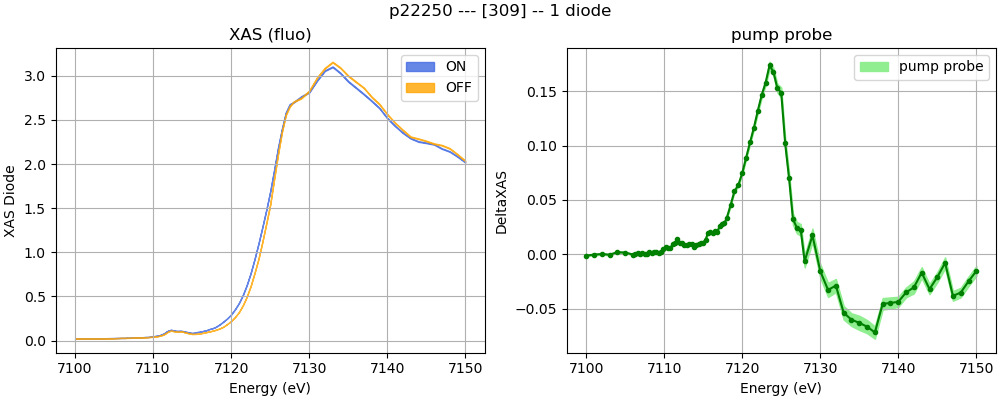

In [146]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.suptitle(titlestring_stack+' -- 1 diode')
if average_twodiodes:
    plt.suptitle(titlestring_stack+' -- 2diodes')

ax1.fill_between(rbk, ES-err_ES, ES+err_ES, label='ON', color='royalblue', alpha = 0.8)
ax1.fill_between(rbk, GS-err_GS, GS+err_GS, label='OFF',color='orange', alpha = 0.8)
ax3.fill_between(rbk, pp-err_pp, pp+err_pp, label='pump probe',color='lightgreen')
#ax3.fill_between(rbk, pp-err_pp2, pp+err_pp2, label='pump probe',color='lightgreen')
ax3.plot(rbk, pp, color='green', marker='.')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax3.set_xlabel("Energy (eV)")
ax3.set_ylabel ("DeltaXAS")
ax3.set_title('pump probe')
ax3.legend(loc="best")
ax3.grid()

plt.show()

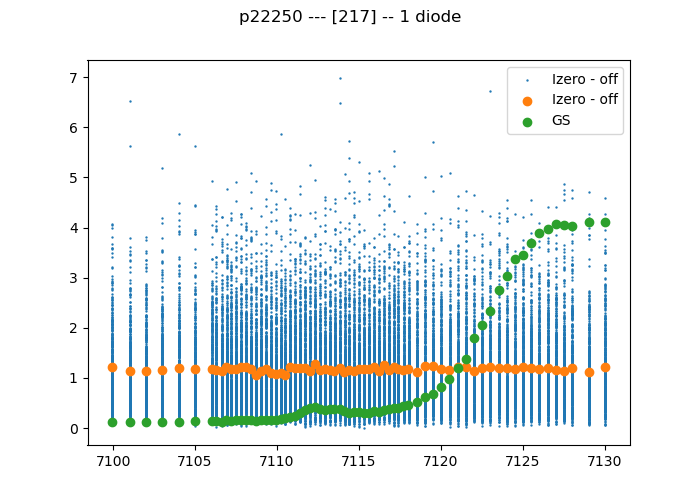

In [120]:
GS = np.array(data['unpump_1'])
Izero_unpump = np.array(data['Izero_unpump'])
energy = np.array(data['energypad'])
readbacks    = np.asarray(readbacks, dtype=object)

ordered = np.argsort(np.asarray(energy))
peaks, what = find_peaks(np.diff(energy[ordered]))

Izero_pump = Izero_pump[ordered]

starts = np.append(0, peaks)
ends = np.append(peaks, None)

I0u = []
G = []

for s, e in zip(starts, ends):
    Izero_p = Izero_pump[s:e]
    GSs = GS[s:e]
    I0u.append(np.mean(Izero_p))
    G.append(np.mean(GSs))

plt.figure(figsize=(7,5))
plt.suptitle(titlestring_stack+' -- 1 diode')
plt.scatter (energy, Izero_pump, label='Izero - off', s=0.5)
plt.scatter(readbacks, I0u, label='Izero - off')
plt.scatter(readbacks, G, label='GS')
#plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS norm')
plt.legend(loc='best')
plt.show()

## save the averaged spectra

In [577]:
SaveAveDir = Loaddir+'_averaged/'

runlist2save = '_'.join(str(x) for x in runlist)
print (runlist2save)

check = isinstance(runlist2save, numbers.Number)
if check:
    run2save = 'run{:04d}'.format(runlist2save)
else:
    run2save = 'run{}'.format(runlist2save)
savedir = SaveAveDir+run2save
os.makedirs(savedir, exist_ok=True)
run_array = {}
run_array[run2save] = {"name": run2save,
                       "ES": ES, 
                       "err_ES": err_ES,
                       "GS": GS,
                       "err_GS": err_GS,
                       "pp": pp,
                       "err_pp": err_pp,
                       "readbacks": rbk
                      }
np.save(savedir+'/run_array', run_array)
print('Data saved in {}/'.format(savedir))

108
Data saved in /sf/alvra/data/p22250/work/Reduced_data//_averaged/run108/


# 2D scan

In [7]:
quantile = 0.7

withTT = True

binsize = 10
min_delay = -150
max_delay = 150

(variable_bins_delay, numbins) = (False, 100)

##############################################
rbk = np.array(readbacks[0], dtype=float)
print( binsize, min_delay, max_delay, quantile, rbk, withTT)
pp_TT, err_pp, GS, ES, Delay_fs_TT, howmany = \
Rebin_and_filter_2Dscans(data, binsize, min_delay, max_delay, quantile, rbk, withTT, threshold=0.05, n_sigma=3, varbin_t=variable_bins_delay, numbins=numbins)

#pp_TT, GS, ES, err_pp, Delay_fs_TT, howmany = \
#Rebin_and_filter_2Dscans_noPair(data, binsize, min_delay, max_delay, quantile, rbk, withTT, threshold=0.05, varbin_t=variable_bins_delay, numbins=numbins)

10 -150 150 0.7 [7099.96274244 7101.00047667 7102.00834274 7102.96433283 7103.95710526
 7105.00943975 7106.01228303 7106.30376074 7106.60782714 7106.91080777
 7107.20293674 7107.50851957 7107.81014386 7108.11258489 7108.40564286
 7108.71054326 7109.0123457  7109.30221181 7109.61028217 7109.91105034
 7110.21464792 7110.50662871 7110.81222009 7111.11126109 7111.40432512
 7111.71085972 7112.01148952 7112.30984457 7112.60747055 7112.91098444
 7113.21186383 7113.50557589 7113.81172369 7114.11225077 7114.40312602
 7114.71140529 7115.01989232 7115.30602248 7115.61100008 7115.91193753
 7116.21189357 7116.51821211 7116.81112859 7117.11274793 7117.40438301
 7117.71801124 7118.01283147 7118.52239813 7119.01265809 7119.51041109
 7120.00798435 7120.51417227 7121.01473952 7121.5148393  7122.01227178
 7122.51075038 7123.00829174 7123.51380588 7124.01492084 7124.51495452
 7125.01332899 7125.51213704 7126.01693845 7126.51383484 7127.01434236
 7127.51972669 7128.01261512 7129.0133472  7130.01672134] Tru

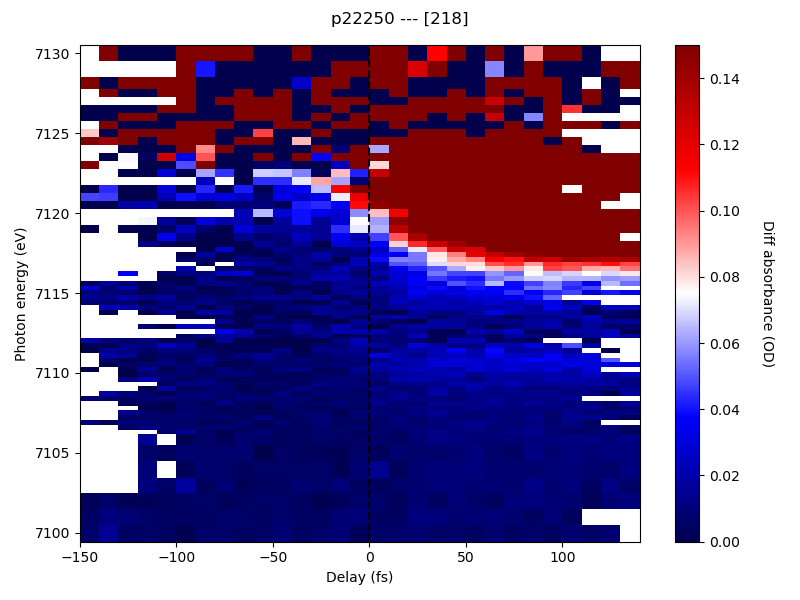

In [8]:
baseline = np.average(pp_TT[:,0:2], axis=1)
#baseline = np.average(GS[:,0:2], axis=1)
baseline = 0 #baseline[:, np.newaxis]

# Delay_fs_TT_2 = Delay_fs_TT[~np.isnan(Delay_fs_TT)]
# pp_TT = pp_TT[:,~np.isnan(Delay_fs_TT)]

plt.figure(figsize=(8, 6))
#plt.rcParams.update({'font.size': 15})
plt.suptitle(titlestring_stack)
#plt.title(runlist)

vmin = -0.0
vmax = 0.15
n = 30
levels = np.linspace(vmin, vmax, n+1)

plt.pcolormesh(Delay_fs_TT, rbk, pp_TT-baseline, cmap='seismic',vmin=vmin, vmax=vmax)
#plt.contourf(pp_TT-baseline, cmap='seismic', levels=levels, extent=[Delay_fs_TT[0], Delay_fs_TT[-1], rbk[0], rbk[-1]], extend='both')
#plt.pcolormesh(Delay_fs_TT+0, rbk, ES-baseline, cmap='jet')#, vmin=-0.004, vmax = 0.011)

#plt.pcolormesh(pp_TT-baseline, cmap='bwr', vmin=-0.1, vmax = 0.1)
#plt.ylabel('{} ({})'.format(_averagedscan.parameters['name'][0],scan.parameters['units'][0]))
plt.ylabel('Photon energy (eV)')

cbar = plt.colorbar(fraction=0.15)
cbar.set_label('Diff absorbance (OD)', rotation=270, labelpad=25)
#plt.colorbar()

plt.xlabel('Delay (fs)')
plt.axvline(x = 0, color = 'k', linestyle = '--')
#plt.grid()
plt.tight_layout()
plt.show()

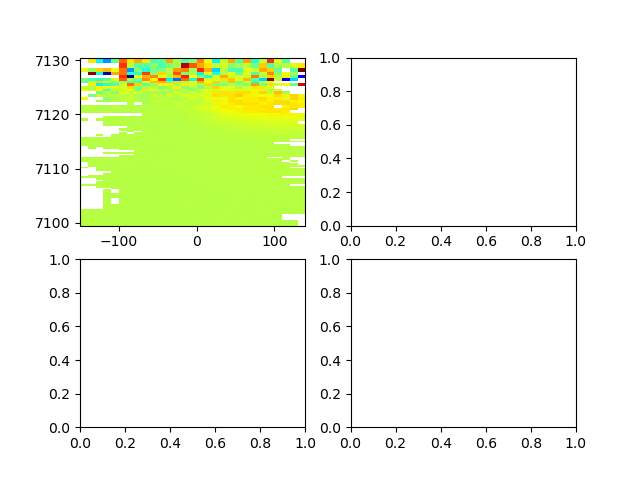

In [9]:
Y, X, DATA = Delay_fs_TT, rbk, pp_TT-baseline
fig,ax = plt.subplots(2, 2)
meshdata = ax[0,0].pcolormesh(Y, X, DATA, cmap='jet')

In [7]:
X.shape, Y.shape, DATA.shape

((69,), (29,), (69, 29))

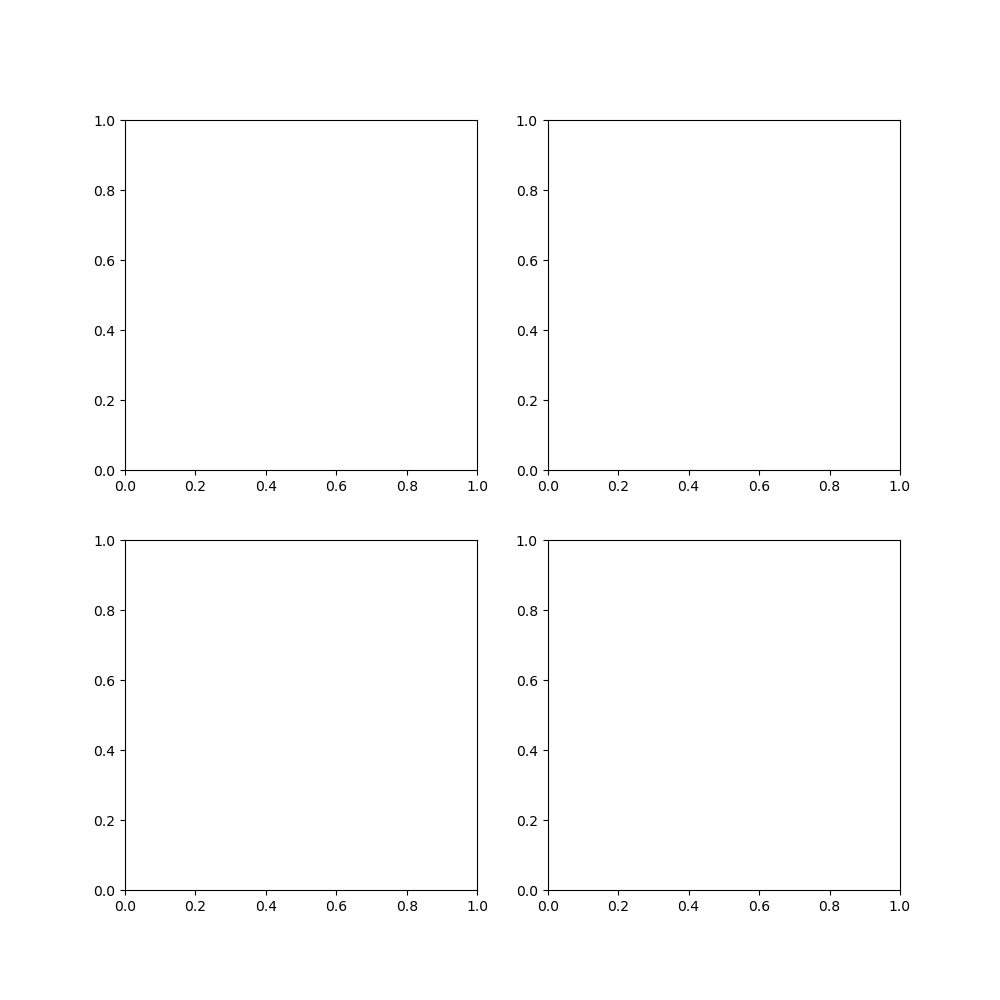

In [207]:
import threading
import time
import ipywidgets as widgets
import matplotlib.widgets as mwidgets
  
class show2DPlot:
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    span_v = None
    span_h = None

    def __init__(self, X, Y, DATA):
        self.X = X
        self.Y = Y
        self.DATA = DATA
        self.x1, self.x2 = None, None
        self.y1, self.y2 = None, None
        
        self.fig, self.ax = plt.subplots(2, 2, figsize=(10,10))
        self.meshdata = self.ax[0,0].pcolormesh(self.Y, self.X, np.log10(self.DATA), cmap='jet')
 
    def _onselect_v(self, x1, x2):
        self.x1, self.x2 = x1, x2
        self.ax[1,0].cla()
        self.ax[1,0].plot(self.Y, self.DATA[(self.X>x1)&(self.X<x2), :].mean(axis=(0)))
        self.fig.canvas.draw()

    def _onselect_h(self, y1, y2):
        self.y1, self.y2 = y1, y2
        self.ax[0,1].cla()
        self.ax[0,1].plot(self.X, self.DATA[:, (self.Y>y1)&(self.Y<y2)].mean(axis=(1)))
        self.fig.canvas.draw()

    def updateData(self, x, y, data):
        self.X = x
        self.Y = y
        self.DATA = data
        self.ax[0,0].cla()
        self.meshdata = self.ax[0,0].pcolormesh(self.Y, self.X, np.log10(self.DATA), cmap='jet')
        self.ax[0,0].set_ylim([self.X.min(), self.X.max()])
        self.ax[0,0].set_xlim([self.Y.min(), self.Y.max()])
        self._create_span()
        self.fig.canvas.draw_idle()
        
        
    def _create_span(self):
        self.span_v = mwidgets.SpanSelector(
            self.ax[0, 0],
            self._onselect_v,
            "vertical",
            useblit=True,
            button=1,
            props=dict(alpha=0.5, facecolor="tab:red"),
            interactive=True,
            drag_from_anywhere=True 
            )

        self.span_h = mwidgets.SpanSelector(
            self.ax[0, 0],
            self._onselect_h,
            "horizontal",
            useblit=True,
            button=3,
            props=dict(alpha=0.5, facecolor="tab:red"),
            interactive=True,
            drag_from_anywhere=True
            )
        
    def set_clim(self, vmin, vmax):
        self.meshdata.set_clim(vmin, vmax)
        self.fig.canvas.draw_idle()
    # def updateData(self, data):
    #     # self.X = x
    #     # self.Y = y
    #     self.DATA = data
    #     self.meshdata.set_array(self.DATA.ravel())
    #     if self.y1 is not None:
    #         self.ax[0,1].cla()
    #         self.ax[0,1].plot(self.X, self.DATA[:, (self.Y>self.y1)&(self.Y<self.y2)].mean(axis=(1)))
    #     if self.x1 is not None:
    #         self.ax[1,0].cla()
    #         self.ax[1,0].plot(self.Y, self.DATA[(self.X>self.x1)&(self.X<self.x2), :].mean(axis=(0)))
    #     self.fig.canvas.draw()


# my2dfig = show2DPlot(X, Y, DATA)
    
# button_update = widgets.Button(description='update 2d figure')
# def update2dFigure(b):
#     _data = DATA
#     my2dfig.updateData(_data)
# button_update.on_click(update2dFigure)

# # button_background_start = widgets.Button(description = 'Start background worker')
# # def _start(b):
# #     my2dfig._data_cheker_start()
# # button_background_start.on_click(_start)


# # button_background_stop = widgets.Button(description = 'Stop background worker')
# # def _stop(b):
# #     my2dfig._data_cheker_stop()
# # button_background_stop.on_click(_stop)

# box = widgets.HBox([button_update])
# display(box)

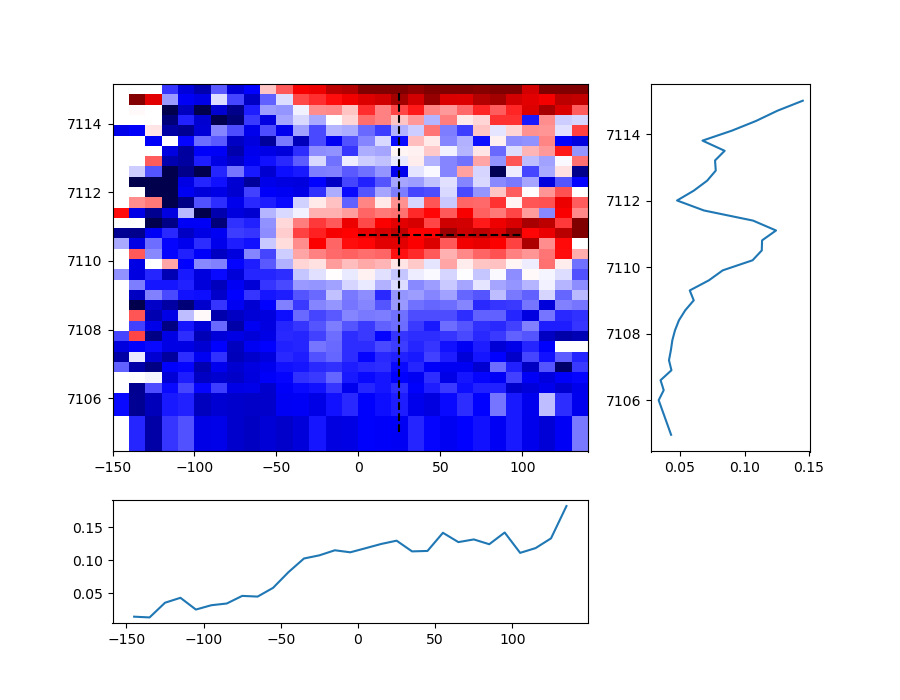

In [859]:
energy_cut = 7110.75
delay_cut = 25
index_energy = np.arange(len(rbk))[(np.array(rbk) > energy_cut)][0]
index_delay = np.arange(len(Delay_fs_TT))[(np.array(Delay_fs_TT) > delay_cut)][0]


f = plt.figure(figsize=(9,7))
gs = gridspec.GridSpec(2,2, height_ratios=[3,1], width_ratios=[3,1])
ax1 = plt.subplot(gs[0,0])
ax1.pcolormesh(Delay_fs_TT, rbk, pp_TT-baseline, cmap='seismic',vmin=vmin, vmax=vmax)
ax1.hlines(energy_cut, ls='--', color='black', xmin=0, xmax=100)
ax1.vlines(delay_cut, ls='--', color='black', ymin=7105, ymax=7115)


ax2 = plt.subplot(gs[1,0])
ax2.plot(Delay_fs_TT, np.array(pp_TT-baseline)[index_energy])

ax2 = plt.subplot(gs[0,1])
ax2.plot(np.array(pp_TT-baseline)[:,index_delay], rbk)


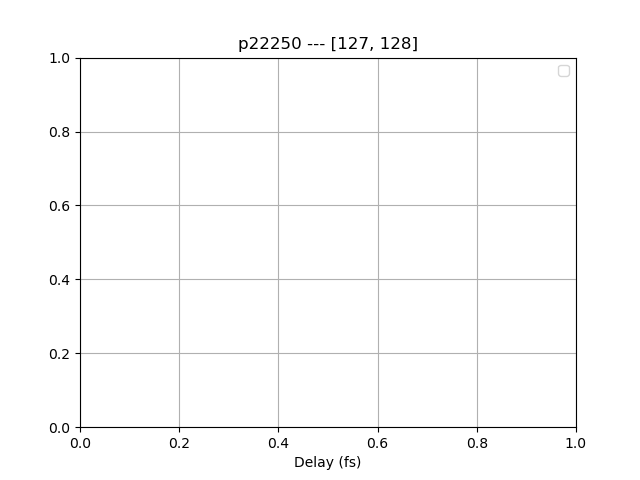

In [825]:
plt.figure()
plt.title(titlestring_stack)
for index, energy in enumerate(rbk):
#    index_point = int(np.argwhere(rbk >= energy)[0])
#    plt.plot(Delay_fs_TT, pp_TT[index_point, :], label='{:.2f}'.format(energy))
    plt.legend(loc='best')

#    index_point = int(np.argwhere(rbk >= energy)[0])
#   pppmean = np.mean(pp_TT[index_point-2:index_point+2,:])
#    plt.plot(Delay_fs_TT, ppmean, label='{:.2f}'.format(energy))
#    plt.legend(loc='best')
    
    
    #fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
    #fit.estimate(Delay_fs_TT, pp_TT[index_point, :])            # this sets some internal params 
    #fit.p0 = better_p0(fit.p0, 0,0)

    # conv_exp_gauss_heaviside --> [x0, amplitude, width, offset, lifetime]
    #fit = Fit(conv_exp_gauss_heaviside, estimate_conv_exp_gauss_heaviside_parameters)
    #fit.p0 =[0, -0.1, 100, 0.06, 200]
    #fit.estimate(Delay_fs_TT, pp_TT[index_point, :])            # this sets some internal params 
    
    #fit.fit(Delay_fs_TT,pp_TT[index_point, :], maxfev=200000)                  # calculate the fit
    #pp_fit = fit.eval(Delay_fs_TT)           # evaluate the curve for plotting
    #print (energy, abs(fit.popt[2]))

    #plt.plot(Delay_fs_TT, pp_fit, color='black')

plt.grid()
plt.xlabel('Delay (fs)')
plt.show()


In [826]:
chosen_point =7713.75
index_point = int(np.argwhere(rbk > chosen_point)[0])
index_point

cut1 = (pp_TT-baseline)[int(np.argwhere(rbk > chosen_point)[0])-1, :]
#cut2 = (pp_TT-baseline)[int(np.argwhere(rbk > chosen_point+1)[0])-1, :]

IndexError: index 0 is out of bounds for axis 0 with size 0

NameError: name 'cut1' is not defined

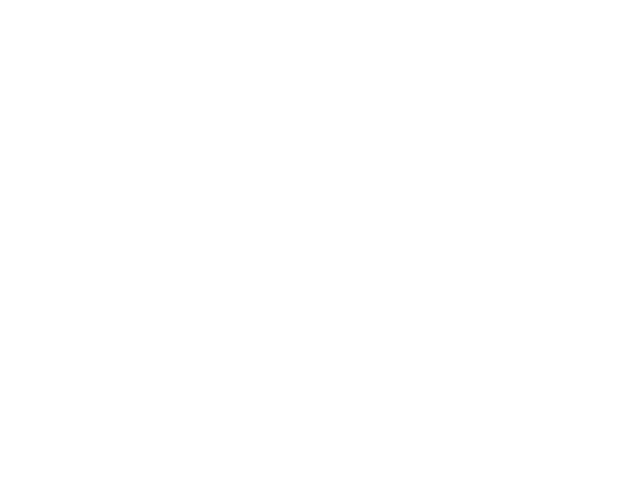

In [827]:
plt.figure()
#plt.title('{}, {}'.format(chosen_point, index_point-1))
plt.plot(Delay_fs_TT, cut1, label='{} eV'.format(chosen_point))
#plt.plot(Delay_fs_TT, cut2, label='{} eV'.format(chosen_point+1))
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
energy_cut1 = 7730
delay_cut1  = 200

vmin = -0.06
vmax = 0.06
n = 30

index_energy1 = np.arange(len(rbk))[(np.array(rbk) > energy_cut1)][0]
index_delay1  = np.arange(len(Delay_fs_TT))[(np.array(Delay_fs_TT) > delay_cut1-1)][0]

baseline = np.average(pp_TT[:,0:2], axis=1)
#baseline = np.average(GS[:,0:2], axis=1)
baseline = 0 #baseline[:, np.newaxis]

levels = np.linspace(vmin, vmax, n+1)

f = plt.figure(figsize=(9, 7))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], width_ratios=[3,1])

ax1 = plt.subplot(gs[0,0])
ax1.set_title(titlestring_stack)

ax1.pcolormesh(rbk, Delay_fs_TT, (pp_TT-baseline).T, cmap='seismic',vmin=vmin, vmax=vmax)
#ax1.contourf((pp_TT-baseline).T, cmap = 'seismic', levels=levels, extent=[rbk[0],rbk[-1],Delay_fs_TT[0],Delay_fs_TT[-1]],extend='both')

ax1.hlines(delay_cut1, ls='--', color='black', xmin=rbk[0], xmax=rbk[-1])
ax1.vlines(energy_cut1, ls='--', color='black', ymin=Delay_fs_TT[0], ymax=Delay_fs_TT[-1])
ax1.set_ylabel('Delay (fs)')

ax2 = f.add_subplot(gs[0,1], sharey=ax1)
#ax3.plot(np.array(pp_TT-baseline)[:,index_energy], timeaxis, label='{} eV'.format(energy_cut))
ax2.plot(np.mean(np.array(pp_TT-baseline)[index_energy1-1:index_energy1+1,:], axis=0), Delay_fs_TT, label='{} eV'.format(energy_cut1))
ax2.legend()
ax2.grid()

ax3 = f.add_subplot(gs[1,0], sharex=ax1)
ax3.plot(rbk, np.array(pp_TT-baseline)[:,index_delay1], label='{} fs'.format(delay_cut1))
ax3.set_xlabel('Energy (eV)')
ax3.legend()
ax3.grid()

#ax4 = plt.subplot(gs[1,1])

plt.tight_layout()


## Overlay data

In [711]:
pgroup = 'p22250'
#runlist = np.arange(45, 48)
# runlist = [61,62,63,64,65,66]
runlist = [96, 97, 98, 117]

#Loaddir_folder = '_averaged'5000
Loaddir_folder = ''

##############################################
#Loaddir = '/sf/alvra/data/{}/work/Reduced_data/All_shots/{}/'.format(pgroup, Loaddir_folder)
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_folder)

titlestring_stack = pgroup + ' --- ' +str(runlist)
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))
check = []
for run in runlist:
    try:
        check.append(glob.glob(Loaddir + '/*{}*/*run_array*'.format(run))[0])
    except:
        print("Some runs are missing")
check

Will load 4 runs: [96, 97, 98, 117] from /sf/alvra/data/p22250/work/Reduced_data//


['/sf/alvra/data/p22250/work/Reduced_data/run0096-XANES_500fs_125mM_255nJ/run_array.npy',
 '/sf/alvra/data/p22250/work/Reduced_data/run0097-XANES_15ps_125mM_255nJ/run_array.npy',
 '/sf/alvra/data/p22250/work/Reduced_data/run0098-XANES_50ps_125mM_1p52uJ/run_array.npy',
 '/sf/alvra/data/p22250/work/Reduced_data/run0117-XANES_125mM_1p52uJ_0fs_001/run_array.npy']

Run 96, Delays_stage offset by 0 fs
Run 96, Delays_corr offset by 0 fs
88 89 89
14196 shots out of 43609 survived
Run 97, Delays_stage offset by 0 fs
Run 97, Delays_corr offset by 0 fs
88 89 89
14298 shots out of 43512 survived
Run 98, Delays_stage offset by 0 fs
Run 98, Delays_corr offset by 0 fs
88 89 89
14224 shots out of 43483 survived
Run 117, Delays_stage offset by 0 fs
Run 117, Delays_corr offset by 0 fs
88 89 89
11664 shots out of 36207 survived


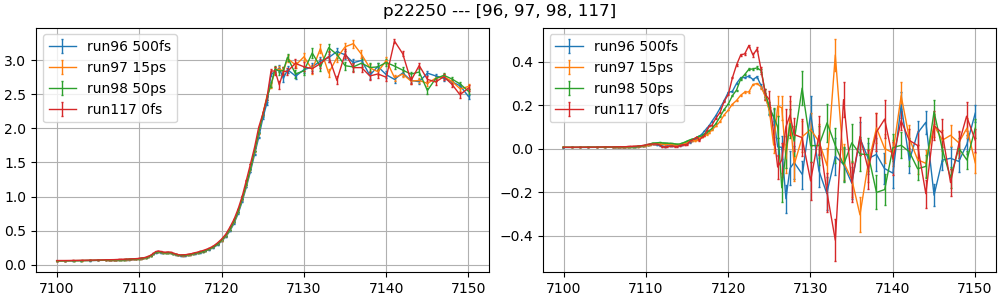

In [712]:
quantile = 0.6
average_twodiodes = False
switch_diodes = True #False for Diode 1, True for diode 2

t0_offset = [0]*len(runlist)
####################################################

fig, ((ax1, ax3)) = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
plt.suptitle(titlestring_stack)

lab = ['500fs','15ps','50ps', '0fs']

for index, run in enumerate(runlist):
    if 'averaged' not in Loaddir_folder:
        runname = 'run{}'.format(run)
        data = {}
        data, _ = load_reduced_data_offset(pgroup, Loaddir, [run], t0_offset, average_twodiodes, switch_diodes)
        globals().update(data)
        #runname = np.asarray(data['name'])[0]
        rbk = np.asarray(data['readbacks'])[0]
    
        pp_rebin, GS, ES, err_pp, err_GS, err_ES, _, _, _, _ = \
        Rebin_and_filter_energyscans_PP(data, quantile, rbk)
        
    if 'averaged' in Loaddir_folder:
        path = glob.glob(Loaddir + '/*{}*/'.format(run))
        run_array = np.load(path[0]+'run_array.npy', allow_pickle=True).item()
        for key in run_array.keys():
            runname  = run_array[key]["name"].split('-')[0] + '_avg'
            GS       = run_array[key]["GS"]
            err_GS   = run_array[key]["err_GS"]
            ES       = run_array[key]["ES"]
            err_ES   = run_array[key]["err_ES"]
            pp_rebin = run_array[key]["pp"]
            err_pp   = run_array[key]["err_pp"]
            rbk      = run_array[key]["readbacks"]

#Plot with suffixes
    ax1.errorbar(rbk, GS, err_GS, lw=1,markersize=0,capsize=1,capthick=1,
                   elinewidth=1,label=runname+' '+str(lab[index]))

    ax3.errorbar(rbk, pp_rebin, err_pp, lw=1,markersize=0,capsize=1,capthick=1,
                   elinewidth=1,label=runname+' '+str(lab[index]))
    # ax1.errorbar(rbk, GS, err_GS, lw=1,markersize=0,capsize=1,capthick=1,
    #                elinewidth=1,label=runname)#+' '+str(lab[index]))

    # ax3.errorbar(rbk, pp_rebin, err_pp, lw=1,markersize=0,capsize=1,capthick=1,
    #                elinewidth=1,label=runname)#+' '+str(lab[index]))

ax1.legend()
ax1.grid()
ax3.legend(loc = 'upper left')
ax3.grid()


# OLD

In [49]:
pgroup = 'p21992'
Loaddir_name = 'XANES'

#runlist = np.arange(22, 23)
#runlist = [140, 146, 141, 147, 145]
runlist = [84, 90, 93, 97, 105, 116, 118, 124, 126, 132, 134, 140, 142]

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist)

globals().update(data)
print (runlist)
print ('{} scan(s), {} steps each'.format(len(runlist), int(len(DataDiode1_pump)/len(runlist))))

[84, 90, 93, 97, 105, 116, 118, 124, 126, 132, 134, 140, 142]
13 scan(s), 16 steps each


In [14]:
pgroup = 'p21992'
Loaddir_name = 'XANES'

#runlist = np.arange(22, 23)
#runlist = [140, 146, 141, 147, 145]
runlist = [93]

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist)

globals().update(data)
print (runlist)
print (len(pump_1))
print ('{} scan(s), {} steps each'.format(len(runlist), int(len(pump_1)/len(runlist))))

[93]
6324
1 scan(s), 6324 steps each


# ONE diode: 
* [Plot averaged curves](#Ave_data)
* [Overlay different scans](#Overlay)

# TWO diodes:
* [Plot averaged curves](#Ave_data_2)
* [Overlay different scans](#Overlay2)
* [Average the 2 diodes](#average_2diodes)

<a id='Ave_data'></a>
## Average scans 1 diode

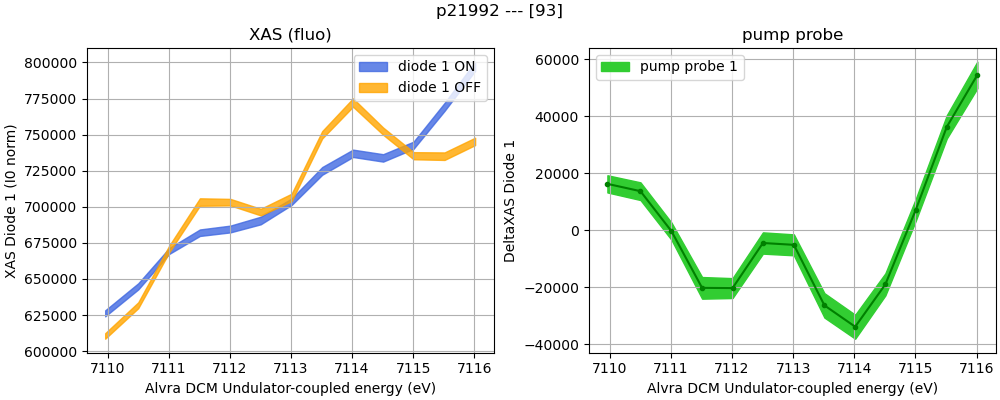

In [15]:
Energy_eV, DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, goodshots1 = \
Plot_AveScans_1diode(titlestring_stack, scan, data, len(runlist), timescan=False)

## save the averaged spectra to load them overlaid

In [368]:
run_name = glob.glob(Loaddir + '/*{:04d}*'.format(runlist[0]))[0].split('/')[-1]
reducedir ='/das/work/p20/p20572/Camila/Reduced_XANES/Averaged/'
os.makedirs(reducedir+run_name, exist_ok=True)

def average_array(array, axis):
    return np.mean(array, axis=axis)
save_reduced_data_1diode(reducedir, run_name, scan, 
                         average_array(DataDiode1_pump, 0), 
                         average_array(DataDiode1_unpump, 0), 
                         average_array(Pump_probe_Diode1, 0), 
                         average_array(goodshots1, 0),
                         average_array(correlation1, 0))
print (reducedir+run_name)

/das/work/p20/p20572/Camila/Reduced_XANES/Averaged/run0136-Fe3_CytC_XAS_5000fs_1.1uJ


In [249]:
np.shape(Pump_probe_Diode1)
pp_100ns = np.average(Pump_probe_Diode1, axis=0)

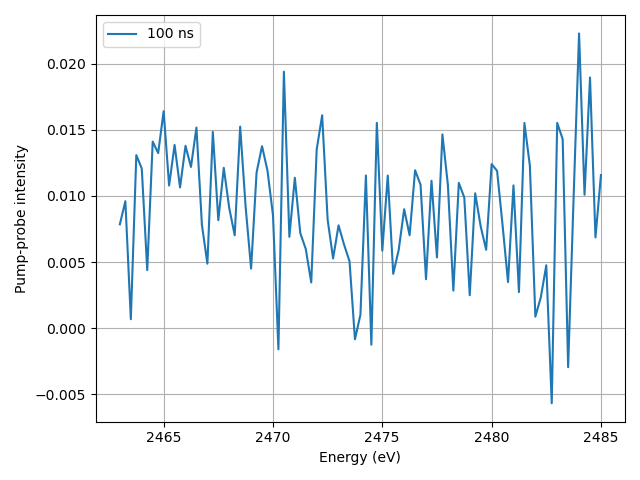

In [250]:
fig, ax = plt.subplots()

# ax.plot(Energy_eV, pp_250fs[:,0], label='250 fs')
# ax.plot(Energy_eV, pp_3ps[:,0], label='3 ps')
# ax.plot(Energy_eV, pp_25ps[:,0], label='25 ps')
ax.plot(Energy_eV, pp_100ns[:,0], label='100 ns')

# ax.fill_between(Energy_eV, pp_250fs[:,1], pp_250fs[:,2], color='b', alpha=0.3)
# ax.fill_between(Energy_eV, pp_3ps[:,1], pp_3ps[:,2], color='orange', alpha=0.3)
# ax.fill_between(Energy_eV, pp_25ps[:,1], pp_25ps[:,2], color='g', alpha=0.3)
# ax.fill_between(Energy_eV, pp_100ns[:,1], pp_100ns[:,2], color='r', alpha=0.3)

ax.set_title('')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Pump-probe intensity')

ax.grid()
ax.legend()
plt.tight_layout()
plt.show()

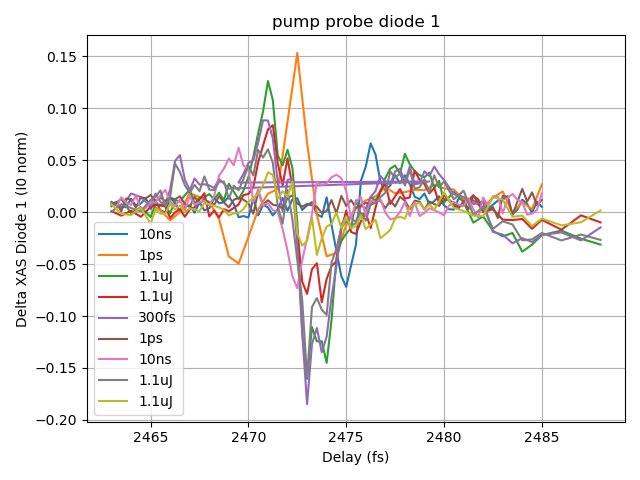

In [169]:
fig, ax1 = plt.subplots(1)

paths = glob.glob(reducedir+'*/run_array.npy')
run_arrays = [np.load(path, allow_pickle=True).item() for path in paths]

for run_array in run_arrays:
    
    for key in run_array.keys():
        delay = run_array[key]['name'].split('_')[-1]
        runnumber = run_array[key]["name"].split('-')[0]
        if 'averaged' in Loaddir:
            runnumber = run_array[key]["name"].split('-')[0] + '_avg'
        Energy_eV = run_array[key]["readbacks"]
        XAS1_pump_probe = run_array[key]["Pump_probe_Diode1"]
        D1p = run_array[key]["DataDiode1_pump"]
        D1u = run_array[key]["DataDiode1_unpump"]
        gs1 = run_array[key]["goodshots1"]
        
        err1_low_pump    = (D1p[:,0]-D1p[:,1])/np.sqrt(gs1)
        err1_high_pump   = (D1p[:,2]-D1p[:,0])/np.sqrt(gs1)
        err1_low_unpump  = (D1u[:,0]-D1u[:,1])/np.sqrt(gs1)
        err1_high_unpump = (D1u[:,2]-D1u[:,0])/np.sqrt(gs1)
        
        err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
        err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)
        
        #ax1.plot(Energy_eV, D1p[:,0], label=runnumber)
        #ax1.plot(Energy_eV, XAS2_pump_probe[:,0], label=lab[index]+'_'+runnumber)
        # ax3 = plt.twinx(ax1)
        # ax3.plot(Energy_eV, XAS1_pump_probe[:,0], label=runnumber)
        
        ax1.plot(Energy_eV, XAS1_pump_probe[:,0], label=delay)
        
        
ax1.set_xlabel("Delay (fs)")
ax1.set_ylabel ("Delta XAS Diode 1 (I0 norm)")
ax1.legend()
ax1.grid()

ax1.set_title('pump probe diode 1')

plt.tight_layout()
plt.show()

<a id='Overlay'></a>
## Overlay different scans 1 diode

In [7]:
pgroup = 'p21992'
#runlist = np.arange(10, 12, 1)
runlist = [169, 178]
#runlist = [124, 126, 132, 134, 140, 142]

Loaddir_folder = 'XANES'

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_folder)
titlestring_stack = pgroup + ' --- ' +str(runlist)
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))
check = []
for run in runlist:
    try:
        check.append(glob.glob(Loaddir + '/*{:04d}*/*run_array*'.format(run))[0])
    except:
        print("Some runs are missing")
check

Will load 2 runs: [169, 178] from /sf/alvra/data/p21992/work/Reduced_data/XANES/


['/sf/alvra/data/p21992/work/Reduced_data/XANES/run0169-MbCO_30um_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0178-MbCO_30um_XANES_500fs/run_array.npy']

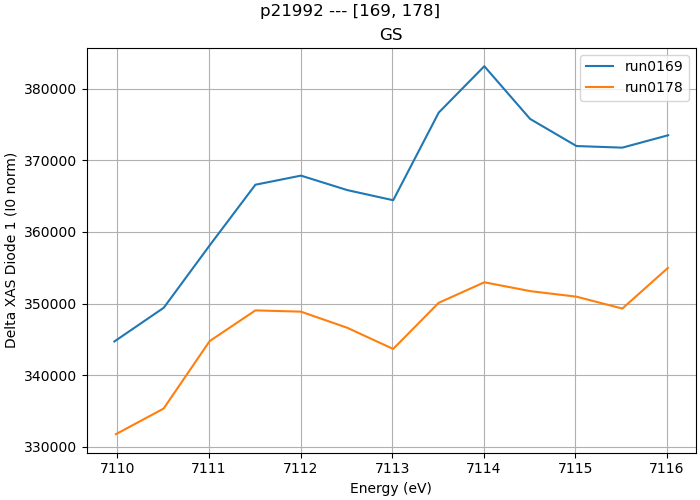

In [9]:
fig, (ax1) = plt.subplots(1, figsize=(7, 5), constrained_layout=True)
plt.suptitle(titlestring_stack)
if 'averaged' in Loaddir:
    plt.suptitle(titlestring_stack + ' averaged')

keys = []
#lab = ['50ps','1ps','200fs']
spec = {}
for index, run in enumerate(runlist):
    path = glob.glob(Loaddir + '/*{:04d}*/'.format(run))
    run_array = np.load(path[0]+'run_array.npy', allow_pickle=True).item()
    for key in run_array.keys():
        runnumber = run_array[key]["name"].split('-')[0]
        
        if 'averaged' in Loaddir:
            runnumber = run_array[key]["name"].split('-')[0] + '_avg'
        #Energy_eV = run_array[key]["Energy_eV"]
        Energy_eV = run_array[key]["readbacks"]
        XAS1_pump_probe = run_array[key]["Pump_probe_Diode1"]
        D1p = run_array[key]["DataDiode1_pump"]
        D1u = run_array[key]["DataDiode1_unpump"]
        gs1 = run_array[key]["goodshots1"]
        
        err1_low_pump    = (D1p[:,0]-D1p[:,1])/np.sqrt(gs1)
        err1_high_pump   = (D1p[:,2]-D1p[:,0])/np.sqrt(gs1)
        err1_low_unpump  = (D1u[:,0]-D1u[:,1])/np.sqrt(gs1)
        err1_high_unpump = (D1u[:,2]-D1u[:,0])/np.sqrt(gs1)
        
        err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
        err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)
        
        # ax1.plot(Energy_eV, (D1u[:,0]-np.mean(D1u[:5,0]))/np.max(D1u[:,0]-np.mean(D1u[:5,0])), label=runnumber)
        #spec[runnumber] = (D1u[:,0]-np.mean(D1u[:15,0]))/np.max(D1u[:,0]-np.mean(D1u[:15,0]))
        # chosen_point = 7113
        # index_point = np.int(np.argwhere(Energy_eV > chosen_point)[0])
        spec[runnumber] = (D1u[:,0])#- D1u[0,0])
        #spec[runnumber] = (XAS1_pump_probe[:,0]-np.mean(XAS1_pump_probe[:5,0]))/np.max(XAS1_pump_probe[:,0]-np.mean(XAS1_pump_probe[:5,0]))
        ax1.plot(Energy_eV, spec[runnumber], label=runnumber) #plot ground state
        #ax1.plot(Energy_eV, XAS1_pump_probe[:,0], label=runnumber) #plot pump probe
        #ax1.plot(Energy_eV, D1u[:,0], label=runnumber) #plot ground state
        #ax1.axes.errorbar(Energy_eV, D1u[:,0], err1_low_unpump, err1_high_unpump, label=runnumber) #plot laser off

        # ax1.axes.errorbar(Energy_eV, XAS1_pump_probe[:,0], (err1_low_pump_probe, err1_high_pump_probe), label=runnumber)
        #ax2 = plt.twinx(ax1)
        #ax2.plot(Energy_eV, D1p[:,0], label=runnumber)
        
        
# ax1.plot(Energy_eV, spec['run0041']-spec['run0071'])       
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("Delta XAS Diode 1 (I0 norm)")
#ax1.set_ylim(0, 0.2e6)
#ax1.set_xlim(7110, 7120)
ax1.legend()
ax1.grid()

#ax1.vlines(x=[2466.35,2466.75, 2469.55, 2472], ymin=-0.3, ymax=0.3, colors='black', ls='--', lw=1)

ax1.set_title('GS')
plt.show()

<a id='Ave_data_2'></a>
## Average scans 2 diodes

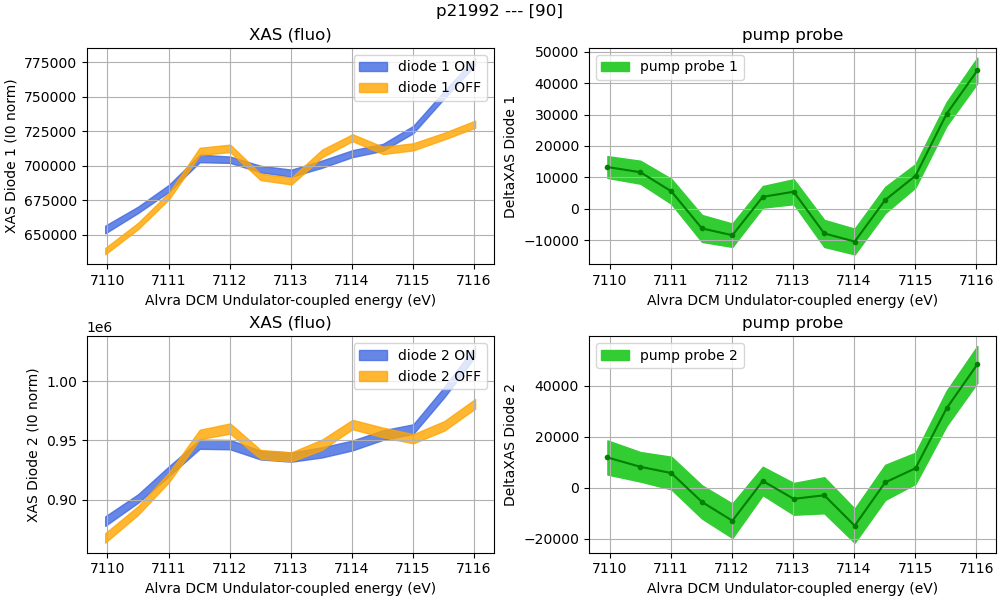

In [20]:
Energy_eV, DataDiode1_pump, DataDiode2_pump, DataDiode1_unpump, DataDiode2_unpump, Pump_probe_Diode1, Pump_probe_Diode2, goodshots1, goodshots2 = \
Plot_AveScans_2diodes(titlestring_stack, scan, data, len(runlist), timescan=False)

## save the averaged spectra to load them overlaid

In [83]:
run_name = glob.glob(Loaddir + '/*{:04d}*'.format(runlist[0]))[0].split('/')[-1]
reducedir ='../Claudio/Reduced_XANES_test/averaged/'
os.makedirs(reducedir+run_name, exist_ok=True)

def average_array(array, axis):
    return np.mean(array, axis=axis)
save_reduced_data_2diodes(reducedir, run_name, scan, 
                          average_array(DataDiode1_pump, 0), 
                          average_array(DataDiode1_unpump, 0), 
                          average_array(Pump_probe_Diode1, 0), 
                          average_array(goodshots1, 0), 
                          average_array(correlation1, 0),
                          average_array(DataDiode2_pump, 0), 
                          average_array(DataDiode2_unpump, 0), 
                          average_array(Pump_probe_Diode2, 0), 
                          average_array(goodshots2, 0),
                          average_array(correlation2, 0))
print (reducedir+run_name)

NameError: name 'DataDiode2_pump' is not defined

<a id='Overlay2'></a>
## Overlay different scans 2 diodes

In [107]:
pgroup = 'p21992'
#runlist = np.arange(10, 12, 1)

runlist = [90, 93, 97, 103, 105, 118]

Loaddir_folder = 'Reduced_data/XANES'

##############################################
Loaddir = '/sf/alvra/data/{}/work/{}/'.format(pgroup, Loaddir_folder)
titlestring_stack = pgroup + ' --- ' +str(runlist)
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))
check = []
for run in runlist:
    try:
        check.append(glob.glob(Loaddir + '/*{:04d}*/*run_array*'.format(run))[0])
    except:
        print("Some runs are missing")
check

Will load 6 runs: [90, 93, 97, 103, 105, 118] from /sf/alvra/data/p21992/work/Reduced_data/XANES/


['/sf/alvra/data/p21992/work/Reduced_data/XANES/run0090-MbCO_XANES_preedge_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0093-MbCO_XANES_preedge_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0097-MbCO_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0103-MbCO_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0105-MbCO_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0118-MbCO_XANES_500fs/run_array.npy']

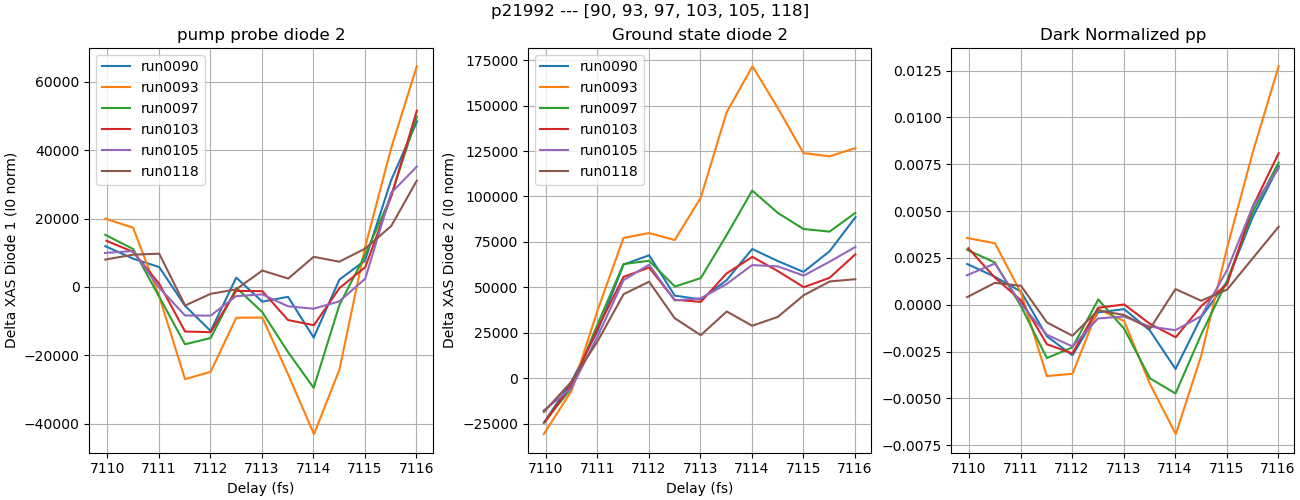

In [113]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(13, 5), constrained_layout=True)
plt.suptitle(titlestring_stack)
if 'averaged' in Loaddir:
    plt.suptitle(titlestring_stack + ' averaged')

keys = []
#lab = ['CuDD 200fs', '500 fs', '1ps', '10ps', '50ps', '100ps']
#lab = ['100 fs t0 adjust','200fs', '1 ps', '2 ps', '10 ps', '50ps', '100 ps']
for index, run in enumerate(runlist):
    path = glob.glob(Loaddir + '/*{:04d}*/'.format(run))
    run_array = np.load(path[0]+'run_array.npy', allow_pickle=True).item()
    for key in run_array.keys():
        runnumber = run_array[key]["name"].split('-')[0]
        if 'averaged' in Loaddir:
            runnumber = run_array[key]["name"].split('-')[0] + '_avg'
        Energy_eV = run_array[key]["readbacks"]
        XAS1_pump_probe = run_array[key]["Pump_probe_Diode1"]
        D1p = run_array[key]["DataDiode1_pump"]
        D1u = run_array[key]["DataDiode1_unpump"]
        gs1 = run_array[key]["goodshots1"]
        
        err1_low_pump    = (D1p[:,0]-D1p[:,1])/np.sqrt(gs1)
        err1_high_pump   = (D1p[:,2]-D1p[:,0])/np.sqrt(gs1)
        err1_low_unpump  = (D1u[:,0]-D1u[:,1])/np.sqrt(gs1)
        err1_high_unpump = (D1u[:,2]-D1u[:,0])/np.sqrt(gs1)
        
        err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
        err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)
        
        #ax1.plot(Energy_eV, D1p[:,0], label=runnumber)
        #ax1.plot(Energy_eV, XAS2_pump_probe[:,0], label=lab[index]+'_'+runnumber)
        # ax3 = plt.twinx(ax1)
        # ax3.plot(Energy_eV, XAS1_pump_probe[:,0], label=runnumber)
        
        XAS2_pump_probe = run_array[key]["Pump_probe_Diode2"]
        D2p = run_array[key]["DataDiode2_pump"]
        D2u = run_array[key]["DataDiode2_unpump"]
        gs2 = run_array[key]["goodshots2"]

        err2_low_pump    = (D2p[:,0]-D2p[:,1])/np.sqrt(gs2)
        err2_high_pump   = (D2p[:,2]-D2p[:,0])/np.sqrt(gs2)
        err2_low_unpump  = (D2u[:,0]-D2u[:,1])/np.sqrt(gs2)
        err2_high_unpump = (D2u[:,2]-D2u[:,0])/np.sqrt(gs2)

        err2_low_pump_probe   = np.sqrt(err2_low_pump**2  + err2_low_unpump**2)
        err2_high_pump_probe  = np.sqrt(err2_high_pump**2 + err2_high_unpump**2)
        
        
        #ax2.plot(Energy_eV, XAS2_pump_probe[:,0], label=runnumber) 
        
        #dark normalized pp 
        D2uN= D2u[:,0]/np.trapz(D2u[:,0],Energy_eV)
        D2pN= D2p[:,0]/np.trapz(D2u[:,0],Energy_eV)
        pp = (D2pN-np.mean(D2pN[:5]))-(D2uN-np.mean(D2uN[:5]))
        
        ax1.plot(Energy_eV, XAS2_pump_probe[:,0], label=runnumber)
        
        ax2.plot(Energy_eV, D2u[:,0]-np.mean(D2u[0:3,0]), label=runnumber)
        #ax2.plot(Energy_eV, D2uN-np.mean(D2uN[0:5]), label=runnumber)
        ax3.plot(Energy_eV, pp, label=runnumber)

        
        
ax1.set_xlabel("Delay (fs)")
ax1.set_ylabel ("Delta XAS Diode 1 (I0 norm)")
ax1.legend()
ax1.grid()
ax2.set_xlabel("Delay (fs)")
ax2.set_ylabel ("Delta XAS Diode 2 (I0 norm)")
ax2.legend()
ax2.grid()

ax1.set_title('pump probe diode 2')
ax2.set_title('Ground state diode 2')
ax3.set_title('Dark Normalized pp')
ax3.grid()
plt.show()

<a id='average_2diodes'></a>
## Average the 2 diodes

In [23]:
Energy_eV, ave_pp1 = Plot_2diodes_Averaged_2figs(titlestring_stack, scan, data, nscans=2, timescan=False)
Energy_eV, ave_pp1 = Plot_2diodes_Averaged_1fig(titlestring_stack, scan, data, nscans=2, timescan=False)

ValueError: cannot reshape array of size 13 into shape (2,newaxis)

In [71]:
pgroup = 'p21604'
Loaddir_name = 'Reduced_XANES'

#runlist = np.arange(22, 23)
runlist = [185, 186]

##############################################
Loaddir = '/sf/alvra/data/{}/work/{}/'.format(pgroup, Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist)

globals().update(data)
print (runlist)
print ('{} scan(s), {} steps each'.format(len(runlist), int(len(DataDiode1_pump)/len(runlist))))

[185, 186]
2 scan(s), 88 steps each


### convert npy to mat files

In [29]:
pgroup = 'p20572'
Loaddir_folder = 'Reduced_XANES/Averaged'

Loaddir = '/sf/alvra/data/{}/work/Camila/{}/'.format(pgroup, Loaddir_folder)
run_name = glob.glob(Loaddir + '/*{:04d}*'.format(runlist[0]))[0].split('/')[-1]

import scipy.io
f = glob.glob(Loaddir + '/{}/*.npy*'.format(run_name))[0]

#for file in f:
temp = np.load(f, allow_pickle=True)
mdic = {run_name.split('-')[0]: temp,}
fname = file.split('/')[-1].split('.')[0]
path = (Loaddir + '/Matlab/')
os.makedirs(path, exist_ok=True)
#print (path + '/' + fname)
scipy.io.savemat(path + run_name + '.mat', mdic)

IndexError: list index out of range

In [40]:
fl = glob.glob(f'/sf/alvra/data/{pgroup}/work/Reduced_data/run*_2D*/')
fl

['/sf/alvra/data/p22250/work/Reduced_data/run0106-XANES_50ps_125mM_1p52uJ_2D_003/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0122-XANES_125mM_0p5uJ_2D_004/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0217-XANES_125mM_1p52uJ_2D_short_003/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0212-XANES_125mM_1p52uJ_2D_short_008/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0215-XANES_125mM_1p52uJ_2D_short_001/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0121-XANES_125mM_0p5uJ_2D_003/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0131-XANES_125mM_0p92uJ_2D_005/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0211-XANES_125mM_1p52uJ_2D_short_007/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0206-XANES_125mM_1p52uJ_2D_short_002/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0119-XANES_125mM_0p5uJ_2D_001/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0216-XANES_125mM_1p52uJ_2D_short_002/',
 '/sf/alvra/data/p22250/work/Reduced_data/run0214-XANES_125mM_1p52uJ_2D_short_010/',
 '/sf/al

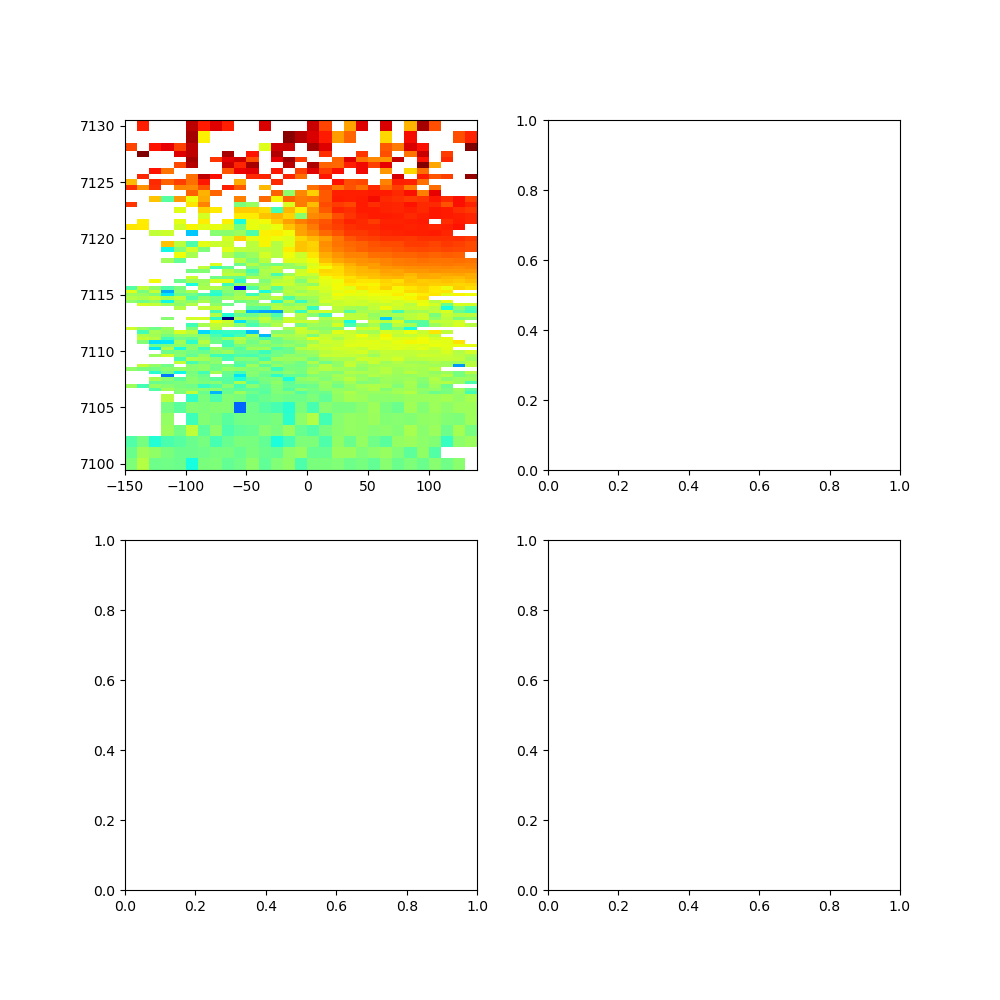

In [210]:
# show all runs in reduced data folder
import ipywidgets as widgets
import re
pgroup = 'p22250'
Loaddir_folder = ''
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_folder)

my2dfig = show2DPlot(X, Y, DATA)
average_twodiodes = widgets.Checkbox(
    value=False,
    description='average two diodes',
    disabled=False,
    indent=False
)

switch_diodes = widgets.RadioButtons(
    options=['diode1', 'diode2'],
    description='diode:',
    disabled=False
)

quantile = widgets.BoundedFloatText(
    value=0.7,
    min=0,
    max=1.0,
    step=0.01,
    description='quantile:',
    disabled=False
)


withTT = widgets.Checkbox(
    value=True,
    description='withTT',
    disabled=False,
    indent=False
)

binsize = widgets.BoundedIntText(
    value=10,
    min=1,
    max=1000,
    step=1,
    description='binsize (fs):',
    disabled=False
)

min_delay = widgets.BoundedIntText(
    value=-150,
    min=-500,
    max=0,
    step=1,
    description='min delay (fs):',
    disabled=False
)

max_delay = widgets.BoundedIntText(
    value=150,
    min=0,
    max=20000,
    step=1,
    description='max delay (fs):',
    disabled=False
)

colorbar = widgets.FloatRangeSlider(
    value=[0, 100],
    min=0,
    max=100,
    step=0.001,
    description='Colorbar:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)


fl = glob.glob(f'/sf/alvra/data/{pgroup}/work/Reduced_data/run*_2D*/')

runLists = []
for f in fl:
    _r = re.search( r'run\d+', f).group()
    _n = int(re.search( r'\d+', _r).group())
    runLists.append(_n)
runLists.sort(reverse=True)

sm = widgets.SelectMultiple(
    options=runLists,
    rows=20,
    description='Time scan list',
    disabled=False
)

btn_update = widgets.Button(
    description='update scan list'
)
def _update_list(b):
    fl = glob.glob(f'/sf/alvra/data/{pgroup}/work/Reduced_data/run*_2D*/')

    runLists = []
    for f in fl:
        _r = re.search( r'run\d+', f).group()
        _n = int(re.search( r'\d+', _r).group())
        runLists.append(_n)
    runLists.sort(reverse=True)
    sm.options = runLists
btn_update.on_click(_update_list)

btn_plot_selected = widgets.Button(
    description='plot selected scans'
)
def _plot_selected(b):
    runlist = sm.value
    
    data, _ = load_reduced_data_offset(pgroup, Loaddir, runlist, [0]*len(runlist), average_twodiodes.value, switch_diodes.value=='diode2')
    (variable_bins_delay, numbins) = (False, 100)
    rbk = np.array(readbacks[0], dtype=float)

    pp_TT, err_pp, GS, ES, Delay_fs_TT, howmany = \
        Rebin_and_filter_2Dscans(data, binsize.value, min_delay.value, max_delay.value, quantile.value, rbk, withTT.value, threshold=0.05, n_sigma=3, varbin_t=variable_bins_delay, numbins=numbins)
    # baseline = np.average(pp_TT[:,0:2], axis=1)
    Y, X, DATA = Delay_fs_TT, rbk, pp_TT
    my2dfig.updateData(X, Y, DATA)
        
btn_plot_selected.on_click(_plot_selected)



btn_set_colorbar = widgets.Button(
    description='set colorbar'
    )
def _set_colorbar(b):
    v1, v2 = colorbar.value
    z1, z2 = np.nanmin(np.log10(my2dfig.DATA)), np.nanmax(np.log10(my2dfig.DATA))
    _d = abs(z1-z2)
    my2dfig.meshdata.set_clim(vmin=z1 + _d * v1/100, vmax=z1 + _d * v2/100)
    my2dfig.fig.canvas.draw()
    
btn_set_colorbar.on_click(_set_colorbar)

settings = widgets.VBox([average_twodiodes, switch_diodes, quantile, withTT, binsize, min_delay, max_delay, btn_update, btn_plot_selected, btn_set_colorbar, colorbar])

# EnergyCuts = widgets.VBox()
# nE_cuts = widgets.BoundedIntText(
#     value=1,
#     min=1,
#     max=100,
#     step=1,
#     description='number of energy cuts:',
#     disabled=False
# )
# def _update_EnergyCuts()


layout = widgets.HBox([settings, sm])
display(layout)